##  Data Analysis and Visualization for The Admissions Story
### Introduction
This data analysis aim to understand the information of the University of Edinburgh's online course admission.It contains applicants from all over the world and apply for a variety of online programmes in each college from 2016 to 2019. Understanding this data enables us to optimise the number of online students admitted into different programmes and help school to make decisions.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import squarify
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_excel('./data/Admission data for data fair.xlsx')

### Data Cleaning
We cleaned out some data that might be unclear and the data holder thought will not be relative or significant.

In [ ]:
# These code for cleaning data is from our group
df = df.loc[df['Region'] != 'Unknown']
df = df.loc[df['Country'] != 'Unknown']
df = df.loc[df['Gender'] != 'N']
df = df.dropna()
df = df.replace('01 Under 25', 'Under 25')

In [ ]:
# Using assertion to test whether the data is cleaned out.
for i , r in df.iterrows():
    assert r['Gender'] == 'F' or 'M', 'The value of "Gender" is "F" or "M".'
    assert r['Region'] != 'Unknown', 'The value of "Region" should be a specific region.'
    assert r['Country'] != 'Unknown', 'The value of "Country" should be a specific country.'
    assert r['Age Class'] == 'Under 25' or '25-34' or '35-44' or '45-54' or '55+','The value of "Age Class" is wrong.'
for i , r in df.iterrows():
    for value in r.isna():
        assert value != True,'There is NaN value in the dataFrame.'

### Data Understanding
A preview of data set.

In [94]:
columnname = list(df.columns)
print('The names of columns are {}.'.format(columnname))

The names of columns are ['Entry Year', 'Month Code', 'Programme Name and Code', 'Programme Code', 'Programme Description', 'Programme Group', 'Subject Area', 'College', 'School', 'PGT or PGR', 'FT or PT', 'ODL', 'Region', 'Country', 'Fee Status Group', 'Age Class', 'Gender', 'Apps', 'Offers', 'Accepts', 'UF', 'Entrants'].


In [117]:
df.head()

Entry Year  Month Code                            Programme Name and Code  \
0     2015/6           9  LLM International Commercial Law and Practice ...   
1     2015/6           9  LLM International Commercial Law and Practice ...   
2     2015/6           9  LLM International Commercial Law and Practice ...   
3     2015/6           9  LLM International Commercial Law and Practice ...   
4     2015/6           9  LLM International Commercial Law and Practice ...   

  Programme Code                              Programme Description  \
0   PTLLMINCLP1F  LLM International Commercial Law and Practice ...   
1   PTLLMINCLP1F  LLM International Commercial Law and Practice ...   
2   PTLLMINCLP1F  LLM International Commercial Law and Practice ...   
3   PTLLMINCLP1F  LLM International Commercial Law and Practice ...   
4   PTLLMINCLP1P  LLM International Commercial Law and Practice ...   

                             Programme Group Subject Area College School  \
0  International Commercial Law and Practice          Law     HSS    Law   
1  International Commercial Law and Practice          Law     HSS    Law   
2  International Commercial Law and Practice          Law     HSS    Law   
3  International Commercial Law and Practice          Law     HSS    Law   
4  International Commercial Law and Practice          Law     HSS    Law   

  PGT or PGR  ...                           Region            Country  \
0        PGT  ...                  Europe (non UK)              Italy   
1        PGT  ...              Europe (rest of UK)            England   
2        PGT  ...  Latin America and the Caribbean  Trinidad & Tobago   
3        PGT  ...                      Middle East                UAE   
4        PGT  ...                Europe (Scotland)           Scotland   

  Fee Status Group Age Class Gender Apps Offers  Accepts  UF  Entrants  
0              OVS     35-44      M    0      0        0   0         1  
1              OVS  Under 25      M    0      0        0   0         1  
2              OVS     35-44      F    0      0        0   0         1  
3              OVS     35-44      M    0      0        0   0         1  
4              OVS     25-34      F    0      0        0   0         1  

[5 rows x 22 columns]

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16374 entries, 0 to 16427
Data columns (total 22 columns):
Entry Year                 16374 non-null object
Month Code                 16374 non-null int64
Programme Name and Code    16374 non-null object
Programme Code             16374 non-null object
Programme Description      16374 non-null object
Programme Group            16374 non-null object
Subject Area               16374 non-null object
College                    16374 non-null object
School                     16374 non-null object
PGT or PGR                 16374 non-null object
FT or PT                   16374 non-null object
ODL                        16374 non-null object
Region                     16374 non-null object
Country                    16374 non-null object
Fee Status Group           16374 non-null object
Age Class                  16374 non-null object
Gender                     16374 non-null object
Apps                       16374 non-null int64
Offers     

# Description of the data
1. The data is in tabular shape, which contains 16374 rows and 22 columns. 
2. It's memory usage is 3.5+ MB.
3. All the data are in Linear structure, each row show the information about students who apply to the University of Edinburgh online programmes.
4. This analysis just focus on the only one data we got from data holder, and it does not use any other foreign data set.

# Summary statistics about the data
### 1.The type of each column: 
This part aims to counts the tpye of values in each column.

In [99]:

# dataframe get the name of volunm
# DataFrame.columns.values.tolist()
column = df.columns.values.tolist() #list of column name
for a in column:
     column_type = pd.DataFrame(df[a].value_counts()) #type of each column
     row_count = column_type.shape[0] #the number of row
     print('The type of [{}]'.format(a),'is {}.'.format(row_count) )
     if row_count <= 30:
          print('They are:{}.'.format(column_type._stat_axis.values.tolist()))
     print('\n')

The type of [Entry Year] is 4.
They are:['2017/8', '2018/9', '2016/7', '2015/6'].


The type of [Month Code] is 12.
They are:[9, 1, 2, 4, 10, 7, 11, 6, 5, 3, 12, 8].


The type of [Programme Name and Code] is 296.


The type of [Programme Code] is 296.


The type of [Programme Description] is 296.


The type of [Programme Group] is 87.


The type of [Subject Area] is 27.
They are:['Clinical Sciences', 'Molecular, Genetic and Population Health Sciences', 'Law', 'Veterinary Medicine', 'Global Health', 'Education', 'PGT GeoSciences', 'International Development', 'Medicine', 'Science and Engineering', 'Philosophy', 'Clinical Psychology', 'History', 'ESALA', 'Microbiology and Infection', 'Science Comm. & Public Engagement', 'English Literature', 'Biomedical Sciences', 'Biotechnology', 'Global Health Policy', 'Biochemistry', 'Business', 'Chemistry', 'Health Other', 'Celtic', 'Science, Technology and Innovation Studies', 'Social Anthropology'].


The type of [College] is 3.
They are:['MVM', '

### 2.The number of applicants, offers, accepts, final entrants and total admission rate.
This data set mainly contains the information about how many applicants applyed to the online programmmes from 2016 to 2019. We could get the information about how many people got offer, how many people accepted the offer and got unconditional offer and finally entried the university.

In [100]:
print('The total number of applicants is {}.'.format(np.sum(df['Apps'])))
print('The total number of applicants who got offer is {}.'.format(np.sum(df['Offers'])))
print('The total number of applicants who accepted the offer is {}.'.format(np.sum(df['Accepts'])))
print('The total number of applicants who got unconditional offer is {}.'.format(np.sum(df['UF'])))
print('The total number of entrants is {}.'.format(np.sum(df['Entrants'])))
adrate = (np.sum(df['Entrants'] )) / (np.sum(df['Apps']))
print('The total admission rate of these four year is {:.2%}.'.format(adrate))

The total number of applicants is 17205.
The total number of applicants who got offer is 10014.
The total number of applicants who accepted the offer is 8068.
The total number of applicants who got unconditional offer is 6230.
The total number of entrants is 5083.
The total admission rate of these four year is 29.54%.


### 3.The number of applicants, offers, accepts, final entrants and admission rate for each year.
According to each years' applicants number and entrants number, we could analyse each year's admission rate.

In [101]:
apps_entrants = {'Apps','Offers','Accepts','UF','Entrants'}
for people in apps_entrants:
    print('The number of {}'.format(people),'in each year:')
    print(np.sum(df[people].groupby(df['Entry Year'])).to_frame().reset_index())
    print('\n')
    
adm_rate = (np.sum(df['Entrants'].groupby(df['Entry Year']))) / (np.sum(df['Apps'].groupby(df['Entry Year'])))
print('The admission rate for each year is:',adm_rate.apply(lambda x: format(x, '.2%')))

year_people = df.groupby('Entry Year',as_index=True)['Apps','Offers','Accepts','Entrants'].sum()
year_people['AdmissionRate'] = (year_people['Entrants'] / year_people['Apps']).apply(lambda x: format(x, '.2%'))
print('\n','The table of the number of people in each year":')
year_people

The number of Accepts in each year:
  Entry Year  Accepts
0     2015/6     1464
1     2016/7     1783
2     2017/8     2647
3     2018/9     2174


The number of Entrants in each year:
  Entry Year  Entrants
0     2015/6       979
1     2016/7      1205
2     2017/8      1436
3     2018/9      1463


The number of Apps in each year:
  Entry Year  Apps
0     2015/6  2772
1     2016/7  3916
2     2017/8  6079
3     2018/9  4438


The number of UF in each year:
  Entry Year    UF
0     2015/6  1237
1     2016/7  1441
2     2017/8  1789
3     2018/9  1763


The number of Offers in each year:
  Entry Year  Offers
0     2015/6    1778
1     2016/7    2281
2     2017/8    3305
3     2018/9    2650


The admission rate for each year is: Entry Year
2015/6    35.32%
2016/7    30.77%
2017/8    23.62%
2018/9    32.97%
dtype: object

 The table of the number of people in each year":


Apps  Offers  Accepts  Entrants AdmissionRate
Entry Year                                               
2015/6      2772    1778     1464       979        35.32%
2016/7      3916    2281     1783      1205        30.77%
2017/8      6079    3305     2647      1436        23.62%
2018/9      4438    2650     2174      1463        32.97%

# Exploration of the data
### The relationship of [Programme Description], [Program Group], [Subject Area], [College], [School]
#### According to inforamtion given by the data holder and analysis, we could find out that the structure and organization of online programmes.
The hierarchy of online programmes is : [College] >>  [School] >> [Subject Area] >>  [Programme Group] >>  [Specific Programme]

In [102]:
hier_program = ['College','Subject Area','Programme Group','Programme Description']
for program in hier_program:
    program_people = df.groupby(program,as_index=True)['Apps','Offers','Accepts','Entrants'].sum()
    program_people['AdmissionRate'] = (program_people['Entrants'] / program_people['Apps']).apply(lambda x: format(x, '.2%'))
    print('\n\n','The table of the number of people in each {}'.format(program))
    print(program_people)



 The table of the number of people in each College
          Apps  Offers  Accepts  Entrants AdmissionRate
College                                                
HSS       4977    2389     1797      1237        24.85%
MVM      10696    6910     5701      3541        33.11%
SCE       1532     715      570       305        19.91%


 The table of the number of people in each Subject Area
                                                   Apps  Offers  Accepts  \
Subject Area                                                               
Biochemistry                                         64      16       13   
Biomedical Sciences                                 140      84       73   
Biotechnology                                       127      38       32   
Business                                             70      13        0   
Celtic                                               16       9        7   
Chemistry                                            32      13        8   
C

## Relationships between variables
### 1.[Entry year] and [Apps], [Region]
The number of different regions' applicants, entrants and entry rate:

In [103]:
df_region = df.groupby('Region',as_index=False)['Apps','Offers','Accepts','Entrants'].sum()
df_region['AdmissionRate'] = (df_region['Entrants'] / df_region['Apps']).apply(lambda x: format(x, '.2')).astype('float')
df_region

Region  Apps  Offers  Accepts  Entrants  \
0                           Africa  6370    2728     2038       476   
1                        East Asia   356     210      170       139   
2                Europe (Scotland)   960     729      642       531   
3                  Europe (non UK)  1452     993      843       702   
4              Europe (rest of UK)  2847    2096     1754      1433   
5  Latin America and the Caribbean   459     313      250       179   
6                      Middle East   767     412      326       217   
7                    North America  1462     951      794       624   
8           South and Central Asia  1372     722      505       190   
9       Southeast Asia & Australia  1160     860      746       592   

   AdmissionRate  
0          0.075  
1          0.390  
2          0.550  
3          0.480  
4          0.500  
5          0.390  
6          0.280  
7          0.430  
8          0.140  
9          0.510

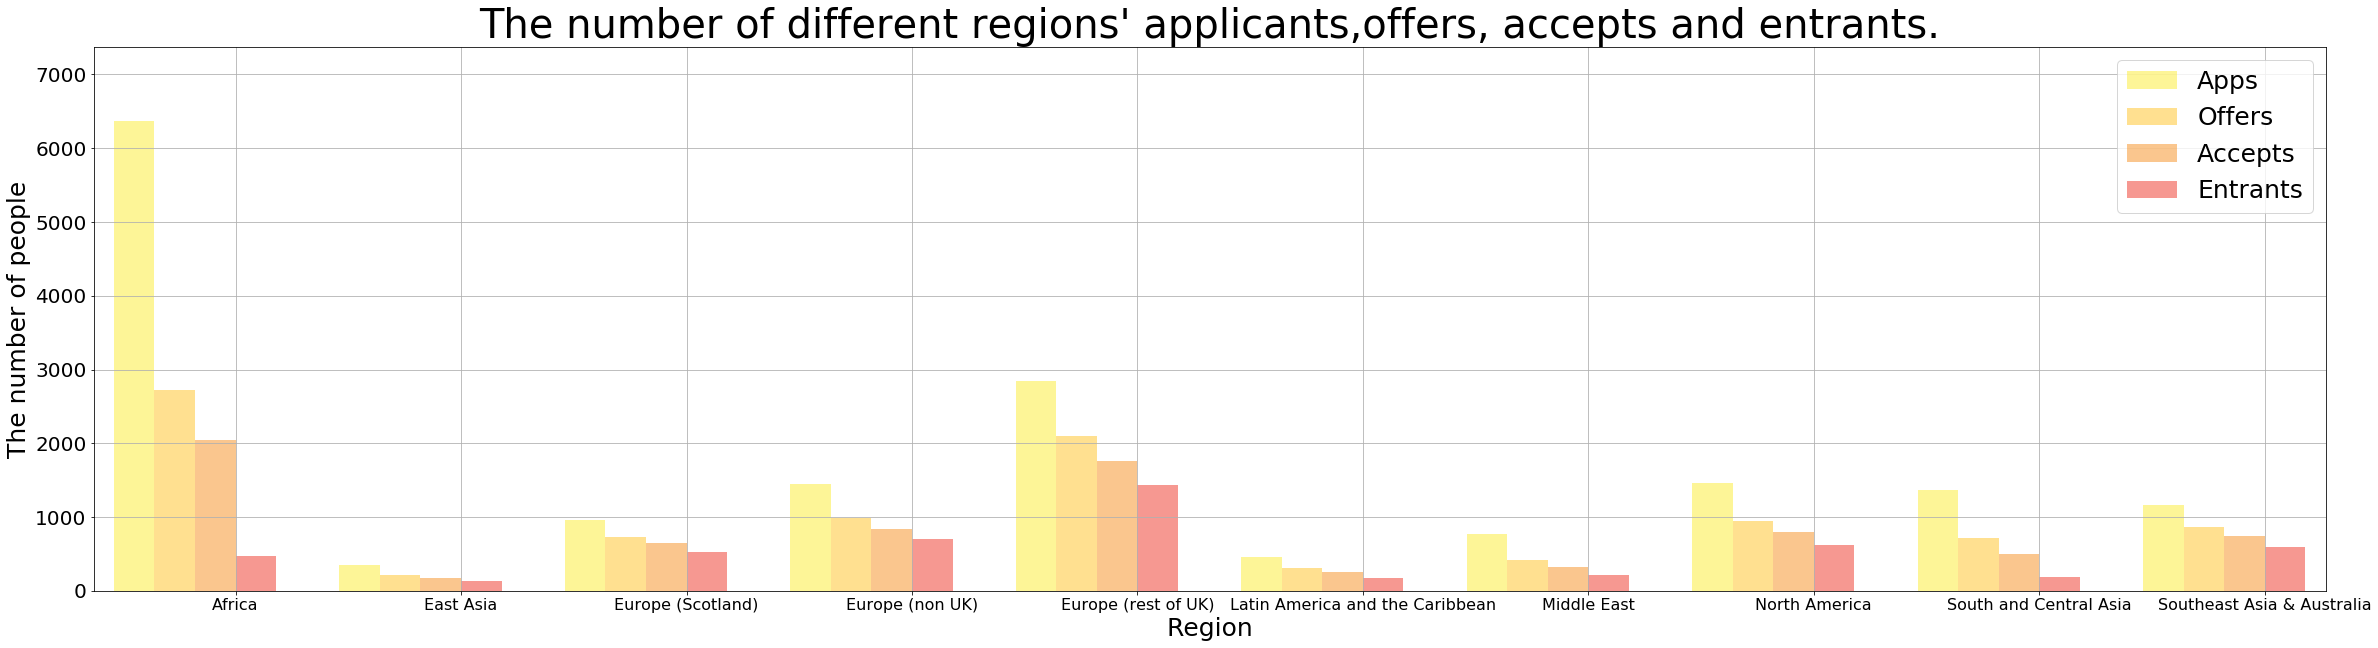

In [104]:
# Setting the positions and width for the bars

pos = list(range(len(df_region['Apps']))) 
width = 0.18
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(40, 10))

# Create a bar with Apps data,
# in position pos,
plt.bar(pos, 
        #using df_region['Apps'] data,
        df_region['Apps'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#fcec30', 
        # with label the first value in first_name
        label=df_region['Region'][0]) 

# Create a bar with Offers data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df_region['Offers'] data,
        df_region['Offers'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the second value in first_name
        label=df_region['Region'][1]) 

# Create a bar with Accepts data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df_region['Accepts'] data,
        df_region['Accepts'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the third value in first_name
        label=df_region['Region'][2]) 

plt.bar([p + width*3 for p in pos], 
        #using df_region['Accepts'] data,
        df_region['Entrants'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the third value in first_name
        label=df_region['Region'][3]) 


# Set the y axis label
ax.set_ylabel('The number of people',fontsize=25)
ax.set_xlabel('Region',fontsize=25)
# Set the chart's title
ax.set_title("The number of different regions' applicants,offers, accepts and entrants.",fontsize=40)

# Set the position of the x,y ticks
ax.set_xticks([p + 2.5 * width for p in pos])
plt.yticks(fontsize=20)
# Set the labels for the x ticks
ax.set_xticklabels(df_region['Region'],fontsize=16)


# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_region['Apps'] + 1000)] )

# Adding the legend and showing the plot
plt.legend(['Apps', 'Offers', 'Accepts','Entrants'], loc='upper right',fontsize=25)
plt.grid()
plt.show()

#### According to this table, we could find out that the number of ['Apps', 'Offers', 'Accepts','Entrants'] is decreasing, which show the real case of admission. It also shows that the Africa region has the highest number of applicants while the Europe region (rest of UK ) has the highest entrants figure. 

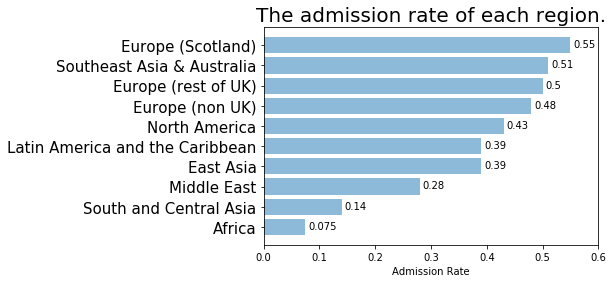

In [105]:
df_region1 = df_region.sort_values(by = 'AdmissionRate')

rate1 = df_region1['AdmissionRate']
region1 = df_region1['Region']

plt.barh(range(len(region1)), rate1, height=0.8, alpha=0.5)   
plt.yticks(range(len(region1)), region1,fontsize=15)
plt.xlim(0,0.6)
plt.xlabel('Admission Rate')
plt.title("The admission rate of each region.",fontsize=20)
for x, y in enumerate(rate1):
    plt.text(y + 0.005, x - 0.1, '%s' % y)
plt.show()

#### The bar chart illustrates the information of amdission rate of each region in these four years. It shows that most developed region has a higher addmission rate than developing areas.

### 2.[Entry year],[Region] and [Apps],[Offers],[Accepts],[Entrants]
The number of different regions' applicants, entrants and entry rate in different years:


In [120]:
df_region_age = df.groupby(['Region','Age Class'],as_index=True)['Apps','Offers','Accepts','Entrants'].sum()
df_region_age['AdmissionRate'] = (df_region_age['Entrants'] / df_region_age['Apps']).apply(lambda x: format(x, '.2%'))
df_region_age

Apps  Offers  Accepts  Entrants  \
Region                          Age Class                                    
Africa                          25-34      3421    1467     1071       234   
                                35-44      2011     891      698       167   
                                45-54       456     197      153        42   
                                55+          97      36       26        12   
                                Under 25    385     137       90        21   
East Asia                       25-34       128      74       65        55   
                                35-44       108      63       48        38   
                                45-54        44      27       21        18   
                                55+          10       8        7         3   
                                Under 25     66      38       29        25   
Europe (Scotland)               25-34       370     291      260       216   
                                35-44       246     188      166       138   
                                45-54       167     123      106        88   
                                55+          44      27       20        13   
                                Under 25    133     100       90        76   
Europe (non UK)                 25-34       622     429      362       304   
                                35-44       433     294      249       209   
                                45-54       168     118      104        89   
                                55+          45      34       30        24   
                                Under 25    184     118       98        76   
Europe (rest of UK)             25-34      1194     929      759       630   
                                35-44       786     569      479       390   
                                45-54       364     263      235       180   
                                55+         145      96       83        67   
                                Under 25    358     239      198       166   
Latin America and the Caribbean 25-34       229     155      129        97   
                                35-44       138     106       83        52   
                                45-54        55      32       25        19   
                                55+           9       6        4         3   
                                Under 25     28      14        9         8   
Middle East                     25-34       351     183      146        94   
                                35-44       267     148      118        79   
                                45-54        61      37       30        20   
                                55+          17       9        7         6   
                                Under 25     71      35       25        18   
North America                   25-34       483     307      254       200   
                                35-44       384     243      197       152   
                                45-54       234     163      143       112   
                                55+         144      92       78        62   
                                Under 25    217     146      122        98   
South and Central Asia          25-34       729     387      275       102   
                                35-44       400     224      159        56   
                                45-54       110      59       40        19   
                                55+          25      10        7         4   
                                Under 25    108      42       24         9   
Southeast Asia & Australia      25-34       608     476      421       342   
                                35-44       282     197      161       121   
                                45-54       108      77       67        52   
                                55+          48      30       27        21   
                                Under 25    114      80       70 

### 3. [Gender]and [Apps],[Offers],[Accepts],[Entrants]
The number of gender of applicants, entrants and entry rate in total years:

In [108]:
df_gender = df.groupby('Gender',as_index=False)['Apps','Offers','Accepts','Entrants'].sum()
df_gender['AdmissionRate'] = (df_gender['Entrants'] / df_gender['Apps']).apply(lambda x: format(x, '.2%'))
df_gender

Gender  Apps  Offers  Accepts  Entrants AdmissionRate
0      F  7627    4860     3971      2816        36.92%
1      M  9578    5154     4097      2267        23.67%

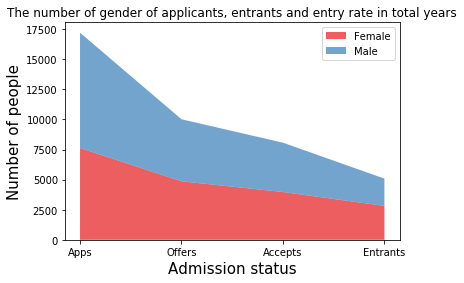

In [109]:
# Your x and y axis
x=['Apps','Offers','Accepts','Entrants']
y=[df_gender.iloc[0,1:5].astype('int'),df_gender.iloc[1,1:5].astype('int')]
 
# use a known color palette (see..)
pal = sns.color_palette("Set1")

plt.stackplot(x,y,labels=['Female','Male'], colors=pal, alpha=0.7 )
plt.legend(loc='upper right')
plt.title("The number of gender of applicants, entrants and entry rate in total years",fontsize=12)
plt.xlabel('Admission status',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()




#### This table and graph show that the figure of applicants, offers and people accepted the offer of male is higher than female, however, the admission rate of female is larger than male.

### 4. [Entry year],[Gender]and [Apps],[Offers],[Accepts],[Entrants]
The number of gender of applicants, entrants and entry rate in different years:

In [110]:
df_year_gender_apps = df.groupby(['Entry Year','Gender'],as_index=False)['Apps','Offers','Accepts','Entrants'].sum()
df_year_gender_apps['AdmissionRate'] = (df_year_gender_apps['Entrants'] / df_year_gender_apps['Apps']).apply(lambda x: format(x, '.2%'))
df_year_gender_apps

Entry Year Gender  Apps  Offers  Accepts  Entrants AdmissionRate
0     2015/6      F  1270     881      738       528        41.57%
1     2015/6      M  1502     897      726       451        30.03%
2     2016/7      F  1732    1153      915       690        39.84%
3     2016/7      M  2184    1128      868       515        23.58%
4     2017/8      F  2564    1502     1213       766        29.88%
5     2017/8      M  3515    1803     1434       670        19.06%
6     2018/9      F  2061    1324     1105       832        40.37%
7     2018/9      M  2377    1326     1069       631        26.55%

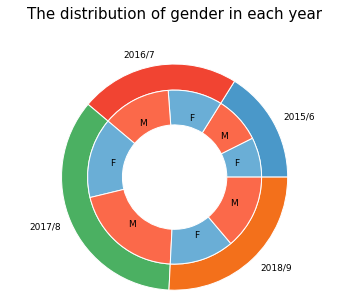

In [131]:

group_names=df_year_gender_apps['Entry Year'].unique().tolist()
df_year = df.groupby('Entry Year',as_index=False)['Apps','Offers','Accepts','Entrants'].sum()


# Make data: I have 4 groups and 2 subgroups
group_names=df_year_gender_apps['Entry Year'].unique().tolist()
group_size= df_year['Apps']
subgroup_names = df_year_gender_apps['Gender']
subgroup_size = df_year_gender_apps['Apps']
 
# Create colors
a, b, c, d =[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6),d(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
#Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.5)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title("The distribution of gender in each year",fontsize=15,y = 1.2) 
plt.show()


#### This graph shows that the distribution of gender of each year. According to this graph, we could do further research about gender equality in each year and different regions in the next step.

### 5. [ 'College', 'School'], ['Region']and [Apps],[Offers],[Accepts],[Entrants]
5.1 The number of applicants in each college and school:

In [112]:
college_people = df.groupby(['College','School'],as_index=False)['Apps','Offers','Accepts','Entrants'].sum()
college_people['AdmissionRate'] = (college_people['Entrants'] / college_people['Apps']).apply(lambda x: format(x, '.2'))
college_people = college_people[college_people['AdmissionRate'] < '100']
college_people

College         School  Apps  Offers  Accepts  Entrants AdmissionRate
0      HSS       Business    70      13        0         0           0.0
1      HSS            ECA   269     190      158       113          0.42
2      HSS      Education   671     403      308       183          0.27
3      HSS            HCA   452     220      167       123          0.27
4      HSS         Health   466     243      185       150          0.32
5      HSS            LLC   228      86       62        56          0.25
6      HSS            Law  1589     584      463       342          0.22
7      HSS           PPLS   367     222      184       151          0.41
8      HSS            SPS   865     428      270       119          0.14
9      MVM     Biomed Sci  2091    1111      922       499          0.24
10     MVM   Clinical Sci  3172    2315     2001      1471          0.46
11     MVM       Dick Vet  1391     992      871       682          0.49
12     MVM    Medical Sch   681     549      444       314          0.46
13     MVM  Molecular Sci  3360    1942     1462       573          0.17
15     SCE        Biology   191      54       45        25          0.13
16     SCE      Chemistry    32      13        8         3         0.094
17     SCE    Geosciences   851     348      275       120          0.14
18     SCE            SCE   458     300      242       157          0.34

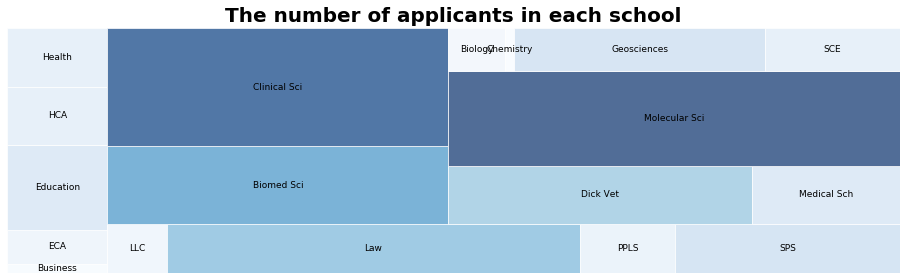

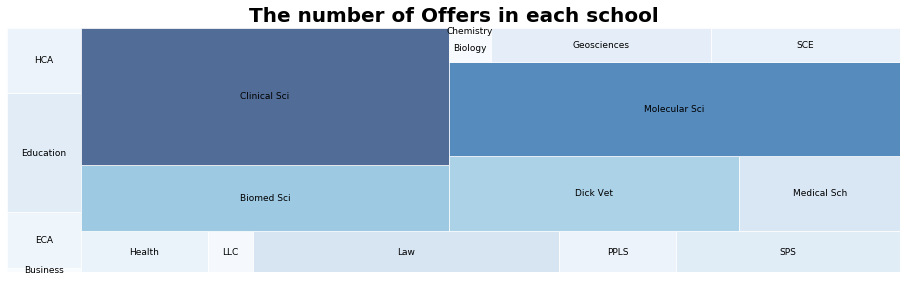

In [116]:
fig = plt.gcf()
fig.set_size_inches(16, 4.5)

cmap = matplotlib.cm.Blues
mini=min(college_people['Apps'])
maxi=max(college_people['Apps'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)

colors = [cmap(norm(value)) for value in college_people['Apps']]
plt.rc('font', size=9)          # controls default text sizes
plt.title("The number of applicants in each school",fontsize=20,fontweight="bold")
squarify.plot(sizes=college_people['Apps'], label=college_people['School'],alpha=.7, color=colors, edgecolor="white")

plt.axis('off')
plt.show()


fig = plt.gcf()
fig.set_size_inches(16, 4.5)

cmap = matplotlib.cm.Blues
mini=min(college_people['Offers'])
maxi=max(college_people['Offers'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)

colors = [cmap(norm(value)) for value in college_people['Offers']]
plt.rc('font', size=9)          # controls default text sizes
plt.title("The number of Offers in each school",fontsize=20,fontweight="bold")
squarify.plot(sizes=college_people['Offers'], label=college_people['School'],alpha=.7, color=colors, edgecolor="white")

plt.axis('off')
plt.show()

#### These two treemaps show the distribution of applicants in each school. The area of rectangle show the size of applicants and people who got offers in different school. The bigger the retangle is , the larger number of people choose the school. 

In [ ]:
# Programme_group_people = df.groupby(['Programme Group'],as_index=True)['Apps','Offers','Accepts','Entrants'].sum()
# Programme_group_people['AdmissionRate'] = (Programme_group_people['Entrants'] / Programme_group_people['Apps']).apply(lambda x: format(x, '.2'))
# Programme_group_people


5.2 The number of applicants of different region in each college and school:

In [132]:
college_country = df.groupby(['Region','College'],as_index=False)['Apps','Offers','Accepts','Entrants'].sum()
college_country['AdmissionRate'] = (college_country['Entrants'] / college_country['Apps']).apply(lambda x: format(x, '.2%'))
college_country

Region College  Apps  Offers  Accepts  Entrants  \
0                            Africa     HSS  1496     421      253        64   
1                            Africa     MVM  4147    2059     1591       366   
2                            Africa     SCE   727     248      194        46   
3                         East Asia     HSS   202      97       72        60   
4                         East Asia     MVM   122      94       84        68   
5                         East Asia     SCE    32      19       14        11   
6                 Europe (Scotland)     HSS   318     201      161       113   
7                 Europe (Scotland)     MVM   567     475      436       382   
8                 Europe (Scotland)     SCE    75      53       45        36   
9                   Europe (non UK)     HSS   529     325      273       229   
10                  Europe (non UK)     MVM   781     590      510       423   
11                  Europe (non UK)     SCE   142      78       60        50   
12              Europe (rest of UK)     HSS   803     496      386       300   
13              Europe (rest of UK)     MVM  1851    1468     1256      1048   
14              Europe (rest of UK)     SCE   193     132      112        85   
15  Latin America and the Caribbean     HSS   120      66       46        31   
16  Latin America and the Caribbean     MVM   302     221      183       134   
17  Latin America and the Caribbean     SCE    37      26       21        14   
18                      Middle East     HSS   241     113       87        66   
19                      Middle East     MVM   466     273      218       137   
20                      Middle East     SCE    60      26       21        14   
21                    North America     HSS   775     440      349       257   
22                    North America     MVM   621     476      415       344   
23                    North America     SCE    66      35       30        23   
24           South and Central Asia     HSS   218      73       45        20   
25           South and Central Asia     MVM  1026     591      419       163   
26           South and Central Asia     SCE   128      58       41         7   
27       Southeast Asia & Australia     HSS   275     157      125        97   
28       Southeast Asia & Australia     MVM   813     663      589       476   
29       Southeast Asia & Australia     SCE    72      40       32        19   

   AdmissionRate  
0          4.28%  
1          8.83%  
2          6.33%  
3         29.70%  
4         55.74%  
5         34.38%  
6         35.53%  
7         67.37%  
8         48.00%  
9         43.29%  
10        54.16%  
11        35.21%  
12        37.36%  
13        56.62%  
14        44.04%  
15        25.83%  
16        44.37%  
17        37.84%  
18        27.39%  
19        29.40%  
20        23.33%  
21        33.16%  
22        55.39%  
23        34.85%  
24         9.17%  
25        15.89%  
26         5.47%  
27        35.27%  
28        58.55%  
29        26.39%

## Reflect and Hypothesise

According to the analysis of the admission story of the University of Edinburgh's online programmes, I understood the organization and structure of each school and the process of admission. These data contains the information about each applicants, like their home country, region, gender, age class and their programmes. This information could tell us many storys about admission and seems to be significant for school administrators to do decison making and make plan for the future years. At the same time, it means that the data is of high value of commercial so we have to keep it secret and can not share online. 

By analysing these data, we could find out what kind of programmes or subject areas are the most or least popular, and we could do deeper research like how these trends change in different years, regions, countries, genders and different ages. Further more, it allows us to find out what kind of programmes are in high competition and the admission rate of each program. According to these trends and clusters, we could do the hypotheses:

1.According to the relationship of [AdmissionRate], and[Region], we could speculate that for people in European regions or countries, they have more chance to entry to the university online programmees. They have high success rate to get offers to these programmes.

2.According to the relationship of [Gender]and [Apps],[Offers],[Accepts],[Entrants], we could speculate that females have more chance to get offers from university and the number of male applicants will still be larger than females.

3.According to the relationship of [Entry year],[Gender]and [Apps],[Offers],[Accepts],[Entrants], we could speculate that the gender gap will increase in the next years.

4.According to the relationship of ['College', 'School'], ['Region']and [Apps],[Offers],[Accepts],[Entrants], we could speculate that the Molecular Sci	and Clinical Sci are the most popular school for online students, and some scool like Chemistry have less applicants may due to the restriction of education environment and facilities. We  could consider why some subject areas have less applicants according to the real education methods and situation.

For further research, we could use foreign data like the economic development level data of different countries, geographic information, subject characteristics or career pages for different subjects data to do further data analysis of the admission story.


